# Sommaire

>[Sommaire](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=TYw5yXhqvJeC)

>[Importation des packages](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=1RpxiTSAtZOP)

>[Importation des données](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=qmdPEpyotv2W)

>[Etude du jeu de données](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=SWwrMy6ouZoW)

>>[Jeu d'entrainements](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=CSRd7mhMufi8)

>>[Jeu de tests](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=mAv2aDXSu2Dk)

>[Préparation des données](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=a6KPE8obvF1s)

>>[Nettoyage des données](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=jUsvaQ_exBxO)

>>[Vectorisation de nos données](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=An0fvw1DymNP)

>>[Récupération de nos données Google Drive](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=kvIJQibS0_2d)

>[Entrainement du modèle Baseline](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=KwlvPArh1It1)

>[Itération de la modélisation](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=3OyWZfil4oAC)

>>[Utilisation d'enmbedding Pré-entrainés (GloVe)](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=nq-62Xx24xEH)

>>>[Récupération de GloVe](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=ycfpmT8J6Gp5)

>>>[Création de notre matrice d'embedding](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=2z3myRnR6RV8)

>>>[Construction du modèle d'entrainement](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=SFYIheaX6ZPz)

>>>[Entrainement du modèle avec notre couche d'embedding GloVe](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=t6lm4IfS607i)

>>>[Résultat](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=wncJJFlT7Ao7)

>>[RNN avec LSTM](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=3tDGzhjA7EbH)

>>>[Récupération du Vocabulaire](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=JwyZz5UY-uxG)

>>>[Construction du modèle](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=JtiqNyK6-yrJ)

>>>[Entrainement du modèle](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=oU4yoj4P-4t8)

>>>[Résultat](#updateTitle=true&folderId=1ajW1fERaCPtf2gYAkzh2iWx6B10S7KXJ&scrollTo=R9qL3ZoBIrm5)



# Importation des packages

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, string, json, ast

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalMaxPool1D, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Importation des données

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/test.csv')
data_test_labels = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/test_labels.csv')
data_test = pd.merge(data_test, data_test_labels, on = ['id'])

# Etude du jeu de données

## Jeu d'entrainements

In [4]:
data_train[20:30]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
20,000b08c464718505,"""\n\n Regarding your recent edits \n\nOnce aga...",0,0,0,0,0,0
21,000bfd0867774845,"""\nGood to know. About me, yeah, I'm studying ...",0,0,0,0,0,0
22,000c0dfd995809fa,"""\n\n Snowflakes are NOT always symmetrical! \...",0,0,0,0,0,0
23,000c6a3f0cd3ba8e,"""\n\n The Signpost: 24 September 2012 \n\n Rea...",0,0,0,0,0,0
24,000cfee90f50d471,"""\n\nRe-considering 1st paragraph edit?\nI don...",0,0,0,0,0,0
25,000eefc67a2c930f,Radial symmetry \n\nSeveral now extinct lineag...,0,0,0,0,0,0
26,000f35deef84dc4a,There's no need to apologize. A Wikipedia arti...,0,0,0,0,0,0
27,000ffab30195c5e1,"Yes, because the mother of the child in the ca...",0,0,0,0,0,0
28,0010307a3a50a353,"""\nOk. But it will take a bit of work but I ca...",0,0,0,0,0,0
29,0010833a96e1f886,"""== A barnstar for you! ==\n\n The Real Life ...",0,0,0,0,0,0


In [5]:
number_of_lines = data_train['toxic'].count()
print('Nombre de données totale : ', number_of_lines)

Nombre de données totale :  159571


In [6]:
print( "Proportion de données toxique (en nombre) :\n",
      data_train.drop(columns=['id', 'comment_text']).sum()
)

Proportion de données toxique (en nombre) :
 toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [7]:
print( "Proportion de données (en pourcentage) :\n",
      (data_train.drop(columns=['id', 'comment_text']).sum() / number_of_lines * 100 ).round(3)
)

Proportion de données (en pourcentage) :
 toxic            9.584
severe_toxic     1.000
obscene          5.295
threat           0.300
insult           4.936
identity_hate    0.880
dtype: float64


## Jeu de tests

In [8]:
data_test[20:30]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
20,00084da5d4ead7aa,==Indefinitely blocked== \n I have indefinitel...,-1,-1,-1,-1,-1,-1
21,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",1,0,0,0,0,0
22,000968ce11f5ee34,Please stop. If you continue to vandalize Wiki...,0,0,0,0,0,0
23,0009734200a85047,== Energy == \n\n I have edited the introduct...,0,0,0,0,0,0
24,00097b6214686db5,":yeah, thanks for reviving the tradition of pi...",-1,-1,-1,-1,-1,-1
25,0009aef4bd9e1697,"MLM Software,NBFC software,Non Banking Financi...",-1,-1,-1,-1,-1,-1
26,000a02d807ae0254,"@RedSlash, cut it short. If you have sources s...",0,0,0,0,0,0
27,000a6c6d4e89b9bc,==================== \n Deception is the way o...,-1,-1,-1,-1,-1,-1
28,000bafe2080bba82,. \n\n Jews are not a race because y...,0,0,0,0,0,0
29,000bf0a9894b2807,:::If Ollie or others think that one list of t...,0,0,0,0,0,0


In [9]:
number_of_lines = data_test['toxic'].count()
print('Nombre de données totale : ', number_of_lines)

Nombre de données totale :  153164


In [10]:
number_of_lines = data_test[data_test['toxic'] >= 0]['toxic'].count()
print('Nombre de données totales exploitables (sans les -1) : ', number_of_lines)

Nombre de données totales exploitables (sans les -1) :  63978


In [11]:
print( "Proportion de données toxique(en nombre) :\n",
      data_test.drop(columns=['id', 'comment_text'])[data_test['toxic'] >= 0].sum()
)

Proportion de données toxique(en nombre) :
 toxic            6090
severe_toxic      367
obscene          3691
threat            211
insult           3427
identity_hate     712
dtype: int64


In [12]:
print( "Proportion de données toxique (en pourcentage) :\n",
      (data_test.drop(columns=['id', 'comment_text'])[data_test['toxic'] >= 0].sum() / number_of_lines * 100 ).round(3)
)

Proportion de données toxique (en pourcentage) :
 toxic            9.519
severe_toxic     0.574
obscene          5.769
threat           0.330
insult           5.357
identity_hate    1.113
dtype: float64


# Préparation des données

In [14]:
# On ne garde que les 15000 premiers exemples (pour les tests)
data_train = data_train[:15000]
data_test = data_test[:15000]

# Préparer le tokenizer et les stopwords
tokenizer = nltk.tokenize.TweetTokenizer()
stop_words = set(stopwords.words('english'))
corpus = []

In [17]:
# @title Liste clean tweet

def clean(tweet):

    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)
    tweet = re.sub(r"donå«t", "do not", tweet)

    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    # Urls
    tweet = re.sub(r"http\S+", "", tweet)
    # Numbers
    tweet = re.sub(r'[0-9]', '', tweet)
    # Eliminating the mentions
    tweet = re.sub("(@[A-Za-z0-9_]+)","", tweet)
    # Remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        tweet = tweet.replace(p, '')

    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')

    # Tokenize
    tweet_words = tokenizer.tokenize(tweet)

    # Eliminating the word if its length is less than 3
    tweet = [w for w in tweet_words if len(w)>2]

    # remove stopwords
    tweet = [w.lower() for w in tweet if not w in stop_words]

    corpus.append(tweet)

    # join back
    tweet = ' '.join(tweet)


    return tweet

In [18]:
# @title Liste Abbréviation
variable_name = ""
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)

In [19]:
def prepare_string(tweet):
  tweet = clean(tweet)
  tweet = convert_abbrev_in_text(tweet)
  return tweet

## Nettoyage des données

In [22]:
%%time
# Apply prepare_string to all rows in 'tweets' column
data_train['comment_text'] = data_train['comment_text'].apply(lambda s : prepare_string(s))
# Drop empty values from dataframe
data_train['comment_text'].replace('', np.nan, inplace=True)
data_train.dropna(subset=['comment_text'], inplace=True)

CPU times: user 10.6 s, sys: 38.6 ms, total: 10.7 s
Wall time: 10.8 s


In [23]:
%%time
# Apply prepare_string to all rows in 'tweets' column
data_test['comment_text'] = data_test['comment_text'].apply(lambda s : prepare_string(s))
# Drop empty values from dataframe
data_test['comment_text'].replace('', np.nan, inplace=True)
data_test.dropna(subset=['comment_text'], inplace=True)

CPU times: user 9.9 s, sys: 44.3 ms, total: 9.95 s
Wall time: 10.1 s


In [24]:
# On supprime la colonne 'id' qui ne nous sert pas
data_train.drop(columns=["id"], inplace=True)
data_test.drop(columns=["id"], inplace=True)

In [25]:
data_test.drop(
    data_test[ data_test['toxic'] == -1 ].index,
    inplace = True
)

In [29]:
data_train[50:60]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
50,said wanted talk bottom lead section written i...,0,0,0,0,0,0
51,get fucked get fuckeeed got drink that you can...,1,0,1,0,0,0
52,are threatening disputing neutrality know coun...,0,0,0,0,0,0
53,thanks undeletion would hoped researching stat...,0,0,0,0,0,0
54,awesome then simply disregard notice thanks,0,0,0,0,0,0
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0
56,tony sidaway obviously fistfuckee loves arm ass,1,0,1,0,1,0
57,review sorry say fail articles gan the several...,0,0,0,0,0,0
58,band pages deletion you thought gone deleting ...,1,0,1,0,0,0
59,why cannot believe fat artie did see recent ap...,1,0,0,0,0,0


## Vectorisation de nos données

In [ ]:
# On supprime les caractères spéciaux et on sépare les mots avec nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
data_train['comment_text'] = data_train['comment_text'].apply(tokenizer.tokenize)
data_test['comment_text'] = data_test['comment_text'].apply(tokenizer.tokenize)

In [39]:
data_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[explanation, why, edits, made, username, hard...",0,0,0,0,0,0
1,"[daww, matches, background, colour, seemingly,...",0,0,0,0,0,0
2,"[hey, man, really, trying, edit, war, guy, con...",0,0,0,0,0,0
3,"[more, cannot, make, real, suggestions, improv...",0,0,0,0,0,0
4,"[you, sir, hero, any, chance, remember, page]",0,0,0,0,0,0


In [40]:
data_test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[thank, understanding, think, highly, would, r...",0,0,0,0,0,0
1,"[dear, god, site, horrible]",0,0,0,0,0,0
2,"[somebody, invariably, try, add, religion, rea...",0,0,0,0,0,0
3,"[says, right, type, the, type, institution, ne...",0,0,0,0,0,0
4,"[before, adding, new, product, list, make, sur...",0,0,0,0,0,0


In [43]:
stopwords_list = set(stopwords.words('english'))

# Fonction pour supprimer les stopwords
def remove_stopwords(word_list):
    filtered_words = [word for word in word_list if word.lower() not in stopwords_list]
    return filtered_words

# Appliquer la fonction sur la colonne 'comment_text'
data_train['comment_text'] = data_train['comment_text'].apply(remove_stopwords)
data_test['comment_text'] = data_test['comment_text'].apply(remove_stopwords)

In [42]:
data_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0
1,"[daww, matches, background, colour, seemingly,...",0,0,0,0,0,0
2,"[hey, man, really, trying, edit, war, guy, con...",0,0,0,0,0,0
3,"[cannot, make, real, suggestions, improvement,...",0,0,0,0,0,0
4,"[sir, hero, chance, remember, page]",0,0,0,0,0,0


In [44]:
data_test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[thank, understanding, think, highly, would, r...",0,0,0,0,0,0
1,"[dear, god, site, horrible]",0,0,0,0,0,0
2,"[somebody, invariably, try, add, religion, rea...",0,0,0,0,0,0
3,"[says, right, type, type, institution, needed,...",0,0,0,0,0,0
4,"[adding, new, product, list, make, sure, relev...",0,0,0,0,0,0


In [45]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction pour lemmatiser les mots
def lemmatize_words(word_list):
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in word_list]
    return lemmatized_words

# Appliquer la fonction sur la colonne 'comment_text'
data_train['comment_text'] = data_train['comment_text'].apply(lemmatize_words)
data_test['comment_text'] = data_test['comment_text'].apply(lemmatize_words)

In [46]:
# Afficher les premières lignes du DataFrame après la lemmatisation
data_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0
1,"[daww, match, background, colour, seemingly, s...",0,0,0,0,0,0
2,"[hey, man, really, trying, edit, war, guy, con...",0,0,0,0,0,0
3,"[cannot, make, real, suggestion, improvement, ...",0,0,0,0,0,0
4,"[sir, hero, chance, remember, page]",0,0,0,0,0,0


In [47]:
data_test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[thank, understanding, think, highly, would, r...",0,0,0,0,0,0
1,"[dear, god, site, horrible]",0,0,0,0,0,0
2,"[somebody, invariably, try, add, religion, rea...",0,0,0,0,0,0
3,"[say, right, type, type, institution, needed, ...",0,0,0,0,0,0
4,"[adding, new, product, list, make, sure, relev...",0,0,0,0,0,0


## Récupération de nos données Google Drive

In [49]:
# On stock nos datas dans un fichier csv dans notre drive pour éviter de refaire toute la manipulation
data_train.to_csv('/content/drive/MyDrive/clean_comments_train.csv', index=False)
data_test.to_csv('/content/drive/MyDrive/clean_comments_test.csv', index=False)

In [50]:
# Récupérer nos datas propre
data_train = pd.read_csv('/content/drive/MyDrive/clean_comments_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/clean_comments_test.csv')

In [ ]:
# Convertit chaque chaîne de caractères formatée comme une liste JSON en une vraie liste de mots
data_train['comment_text'] = data_train['comment_text'].apply(lambda x: ast.literal_eval(x))
data_test['comment_text'] = data_test['comment_text'].apply(lambda x: ast.literal_eval(x))

# Reconstitue les mots en phrases
sentences_train = list(map(lambda x: " ".join(x), data_train['comment_text']))
sentences_test = list(map(lambda x: " ".join(x), data_test['comment_text']))

# Entrainement du modèle Baseline

In [65]:
# Pour le premier modèle, on va utiliser un Random Forest Classifier
# Avant cela, on va vectoriser les phrases avec TF-IDF
vectorizer = TfidfVectorizer()

# On fit le vectorizer sur les phrases
vectorizer.fit(sentences_train)

# On transforme les phrases en vecteurs
train_vectors = vectorizer.transform(sentences_train)
test_vectors = vectorizer.transform(sentences_test)

# Séparation des données en train et test
train_labels = data_train.drop('comment_text', axis=1)
test_labels = data_test.drop('comment_text', axis=1)

# Affichage des dimensions des données
print(f"Train sequences shape : {train_vectors.shape}")
print(f"Test sequences shape : {test_vectors.shape}")
print(f"Train labels shape : {train_labels.shape}")
print(f"Test labels shape : {test_labels.shape}")

Train sequences shape : (14995, 44880)
Test sequences shape : (6225, 44880)
Train labels shape : (14995, 6)
Test labels shape : (6225, 6)


In [67]:
# Maintenant, on peut créer le modèle
model = RandomForestClassifier(n_estimators=15,random_state=0)

# Entrainement du modèle
model.fit(train_vectors, train_labels)

# Prédiction sur les données de test
predictions = model.predict(test_vectors)

# Affichage de l'accuracy
print(f"Accuracy : {accuracy_score(test_labels, predictions)}")

Accuracy : 0.8918875502008032


# Itération de la modélisation

## Utilisation d'enmbedding Pré-entrainés (GloVe)

In [72]:
# Préparer le tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data_train['comment_text'])

# Convertir les textes en séquences
sequences_train = tokenizer.texts_to_sequences(data_train['comment_text'])
sequences_test = tokenizer.texts_to_sequences(data_test['comment_text'])

# Padding des séquences pour avoir la même longueur
# Choisissez une longueur max ou utilisez la longueur du commentaire le plus long
max_length = max(max(len(seq) for seq in sequences_train), max(len(seq) for seq in sequences_test))

padded_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

In [73]:
X_train = padded_train
y_train = data_train.drop(columns=['comment_text'])
X_test = padded_test
y_test = data_test.drop(columns=['comment_text'])

### Récupération de GloVe

In [74]:
path_to_glove_file = '/content/drive/My Drive/glove.6B/glove.6B.100d.txt'

In [75]:
# Chargement des embeddings GloVe
embeddings_index = {}
with open(path_to_glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

### Création de notre matrice d'embedding

In [76]:
# Création de la matrice d'embeddings
embedding_dim = 100
num_tokens = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [77]:
# Initialisation de la couche d'embedding
embedding_layer = Embedding(num_tokens,
                            embedding_dim,
                            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                            trainable=False)

### Construction du modèle d'entrainement

In [99]:
embedding_dim = 100

model = Sequential()
# Ajout de la couche d'embedding pré-entraînée
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))  # Important de ne pas entraîner cette couche pour garder les embeddings GloVe

# Aplatir la sortie pour la connecter à des couches denses
model.add(Flatten())

# Ajout d'une couche dense simple avec une activation ReLU
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour réduire le surajustement

# Couche de sortie
model.add(Dense(6, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_score])

### Entrainement du modèle avec notre couche d'embedding GloVe

In [100]:
batch_size = 64
# On utilise notre sous-ensemble pour réduire le temps d'entrainement
history_Glove = model.fit(X_train, y_train, epochs=10,batch_size = batch_size, validation_data=(X_test, y_test))

Epoch 1/10
234/235 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.0568 - f1_score: 0.0115

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


235/235 [==============================] - 23s 93ms/step - loss: 0.2535 - accuracy: 0.0572 - f1_score: 0.0115 - val_loss: 0.1379 - val_accuracy: 0.9791 - val_f1_score: 0.0000e+00
Epoch 2/10
235/235 [==============================] - 21s 91ms/step - loss: 0.1349 - accuracy: 0.5519 - f1_score: 0.0067 - val_loss: 0.1249 - val_accuracy: 0.9926 - val_f1_score: 0.0065
Epoch 3/10
235/235 [==============================] - 20s 85ms/step - loss: 0.1104 - accuracy: 0.7980 - f1_score: 0.0123 - val_loss: 0.1146 - val_accuracy: 0.9950 - val_f1_score: 0.0068
Epoch 4/10
235/235 [==============================] - 18s 79ms/step - loss: 0.0968 - accuracy: 0.8629 - f1_score: 0.0100 - val_loss: 0.1094 - val_accuracy: 0.9981 - val_f1_score: 0.0102
Epoch 5/10
235/235 [==============================] - 19s 82ms/step - loss: 0.0882 - accuracy: 0.9230 - f1_score: 0.0109 - val_loss: 0.1064 - val_accuracy: 0.9960 - val_f1_score: 0.0077
Epoch 6/10
235/235 [==============================] - 19s 81ms/step - loss: 0

### Résultat

In [97]:
# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

195/195 [==============================] - 2s 10ms/step - loss: 0.1054 - accuracy: 0.9955
Test Loss: 0.10540106892585754
Test Accuracy: 0.9955019950866699


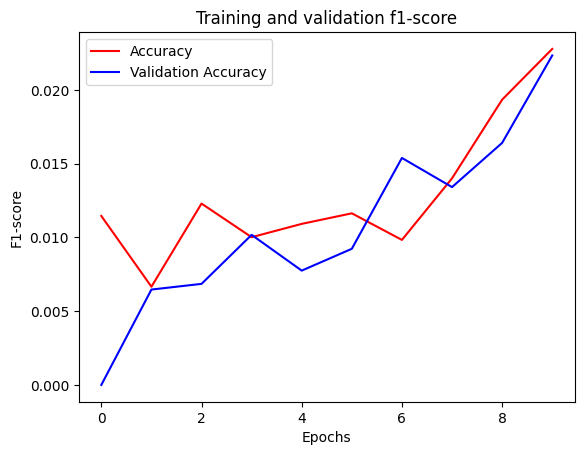

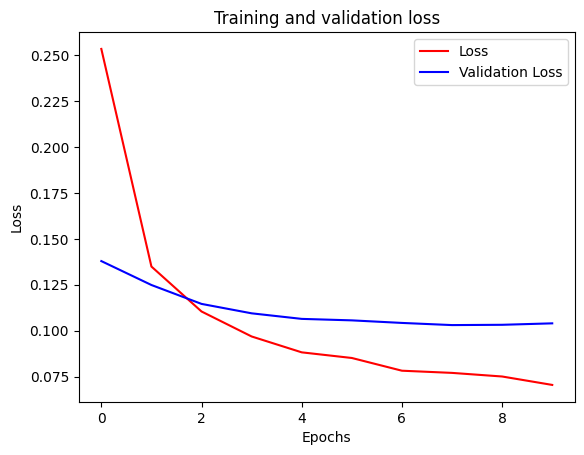

In [101]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_Glove.history['f1_score']
val_acc=history_Glove.history['val_f1_score']
loss=history_Glove.history['loss']
val_loss=history_Glove.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation f1-score')
plt.xlabel("Epochs")
plt.ylabel("F1-score")
plt.legend(["Accuracy","Validation Accuracy"])

plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.show()

## RNN avec LSTM

### Récupération du Vocabulaire

In [87]:
word_index = tokenizer.word_index
vocab_size = len(word_index)

In [84]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, threshold=0.5, num_classes=None, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.num_classes = num_classes
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.math.greater_equal(y_pred, self.threshold)
        y_true = tf.cast(y_true, tf.bool)

        true_positives = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
        false_positives = tf.logical_and(tf.equal(y_true, False), tf.equal(y_pred, True))
        false_negatives = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, False))

        self.true_positives.assign_add(tf.reduce_sum(tf.cast(true_positives, tf.float32)))
        self.false_positives.assign_add(tf.reduce_sum(tf.cast(false_positives, tf.float32)))
        self.false_negatives.assign_add(tf.reduce_sum(tf.cast(false_negatives, tf.float32)))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
        return f1

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

### Construction du modèle

In [88]:
embedding_dim = 100

# Création du modèle
model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    LSTM(units=60, return_sequences=True),
    GlobalMaxPool1D(),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dropout(0.1),
    Dense(6, activation='sigmoid')
])

# Création de la métrique F1
f1_score = F1Score(num_classes=6, threshold=0.9)

# Compilation du modèle
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', f1_score])

# Affichage du résumé du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1343, 100)         4493000   
                                                                 
 lstm (LSTM)                 (None, 1343, 60)          38640     
                                                                 
 global_max_pooling1d (Glob  (None, 60)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                      

### Entrainement du modèle

In [91]:
batch_size = 64
history = model.fit(X_train, y_train, epochs=5,batch_size = batch_size, validation_data=(X_test, y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


235/235 [==============================] - ETA: 0s - loss: 1.3184 - accuracy: 0.9809 - f1_score: 0.0255

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


235/235 [==============================] - 415s 2s/step - loss: 1.3184 - accuracy: 0.9809 - f1_score: 0.0255 - val_loss: 0.4779 - val_accuracy: 0.9883 - val_f1_score: 0.1552
Epoch 2/5
235/235 [==============================] - 412s 2s/step - loss: 2.2648 - accuracy: 0.9895 - f1_score: 0.2786 - val_loss: 0.7295 - val_accuracy: 0.9981 - val_f1_score: 0.2451
Epoch 3/5
235/235 [==============================] - 409s 2s/step - loss: 3.0337 - accuracy: 0.9929 - f1_score: 0.3990 - val_loss: 1.3273 - val_accuracy: 0.9981 - val_f1_score: 0.3224
Epoch 4/5
235/235 [==============================] - 407s 2s/step - loss: 4.2874 - accuracy: 0.9937 - f1_score: 0.4693 - val_loss: 2.3053 - val_accuracy: 0.9981 - val_f1_score: 0.3816
Epoch 5/5
235/235 [==============================] - 440s 2s/step - loss: 5.4516 - accuracy: 0.9935 - f1_score: 0.5327 - val_loss: 3.5986 - val_accuracy: 0.9981 - val_f1_score: 0.3923


### Résultat

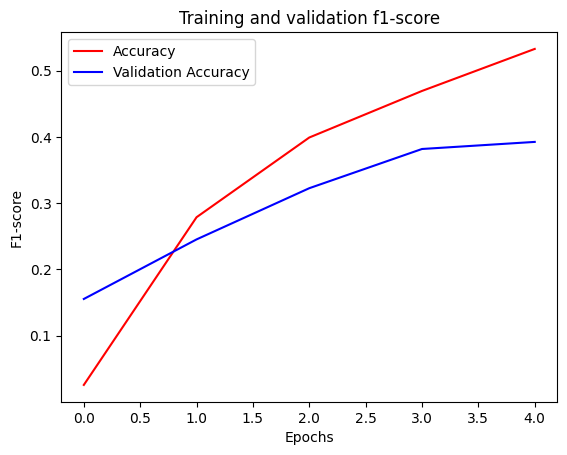

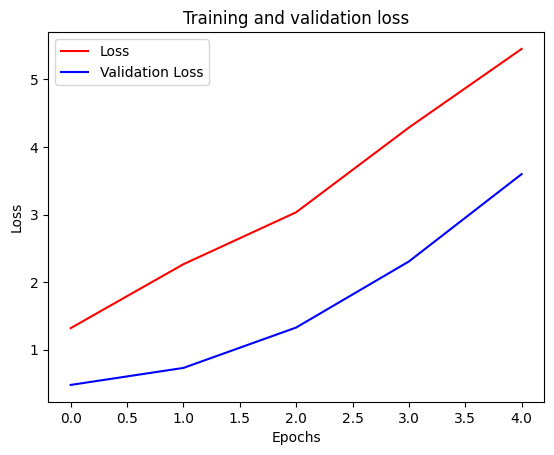

In [93]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['f1_score']
val_acc=history.history['val_f1_score']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation f1-score')
plt.xlabel("Epochs")
plt.ylabel("F1-score")
plt.legend(["Accuracy","Validation Accuracy"])

plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.show()